Update in corporate dataset:  
- Delete ‘CUSIP’
- Add 'city','loc', 'naics', 'sic', 'state'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import matplotlib
matplotlib.__version__

'3.6.2'

In [ ]:
!pip install matplotlib --upgrade
import matplotlib
from matplotlib import pyplot as plt
matplotlib.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 7.0 MB/s 
     |████████████████████████████████| 295 kB 67.3 MB/s 
     |████████████████████████████████| 965 kB 87.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


'3.2.2'

# EXECUTIVE: `df_e`

Import Data

In [ ]:
url1 = 'https://drive.google.com/file/d/1qccfFnoWhW73er5C3Rh7FQMRfJ3MiLlc/view?usp=sharing'
path1 = 'https://drive.google.com/uc?export=download&id='+url1.split('/')[-2]
data1 = pd.read_csv(path1)
print(data1.shape)
data1.head(20)

(69528, 10)


,CO_PER_ROL,TOTAL_ALT1,AGE,TDC1,GVKEY,YEAR,EXEC_LNAME,EXEC_FNAME,GENDER,CUSIP
0,5623,4710.191,63.0,4674.464,1004,2015,Storch,David,MALE,00036110
1,5626,1312.188,59.0,1280.612,1004,2015,Romenesko,Timothy,MALE,00036110
2,20106,1354.411,54.0,1351.092,1004,2015,Sharp,Michael,MALE,00036110
3,44350,1486.976,58.0,1486.976,1004,2015,Regan,Robert,MALE,00036110
4,51547,1939.090,39.0,1938.457,1004,2015,"Holmes, III",John,MALE,00036110
5,64669,881.141,49.0,881.141,1004,2015,Fortson,John,MALE,00036110
6,5623,6109.939,64.0,6072.592,1004,2016,Storch,David,MALE,00036110
7,5626,2631.868,60.0,2598.860,1004,2016,Romenesko,Timothy,MALE,00036110
8,20106,727.560,55.0,724.091,1004,2016,Sharp,Michael,MALE,00036110
9,44350,1904.966,59.0,1904.966,1004,2016,Regan,Robert,MALE,00036110


Number of lines for each corporate data (by GVKEY)

<AxesSubplot: >

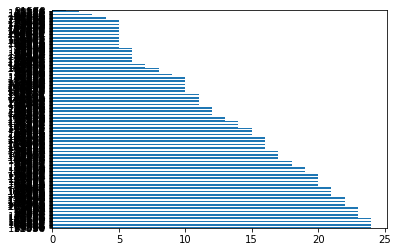

In [ ]:
ts = data1['GVKEY'].value_counts()
# print(ts)
ts[len(ts)-500:].plot(kind='barh')
# ts[len(ts)-500:]

Drop NaN

In [ ]:
data1=data1.dropna(subset=['TOTAL_ALT1','TDC1'])
# df2=df.dropna(subset=['TOTAL_ALT1','TDC1']).reset_index(drop=True)
data1['GENDER'] = (data1['GENDER'] == 'FEMALE').astype(int)
print(data1.shape) # drop ~2k rows with NaN value
# data1.head(20)

(67256, 10)


Group By [GVKEY, YEAR, CUSIP]

In [ ]:
df_e = data1.groupby(['GVKEY','YEAR','CUSIP']) \
            .agg({'CO_PER_ROL':'size', 'TOTAL_ALT1': 'mean', 'TDC1': 'mean', 'GENDER':'mean', 'AGE':'mean'}) \
            .rename(columns={'CO_PER_ROL':'num_exec', 'TOTAL_ALT1': 'avg_TOTAL_ALT1', 'TDC1': 'avg_TDC1', 'GENDER':'pct_female', 'AGE':'avg_age'}) \
            .reset_index()
df_e = df_e.rename(columns = {'GVKEY':'gvkey','YEAR':'fyear','CUSIP':'cusip'})
print(df_e.shape)
df_e.head(20)

(13128, 8)


,gvkey,fyear,cusip,num_exec,avg_TOTAL_ALT1,avg_TDC1,pct_female,avg_age
0,1004,2015,00036110,6,1947.332833,1935.457000,0.000000,53.666667
1,1004,2016,00036110,6,2741.178333,2728.764000,0.000000,53.666667
2,1004,2017,00036110,6,3320.968333,3298.591667,0.000000,54.333333
3,1004,2018,00036110,5,1613.211000,1613.066400,0.000000,47.400000
4,1004,2019,00036110,6,1635.441833,1635.315833,0.166667,44.833333
5,1004,2020,00036110,5,1856.675600,1856.517600,0.200000,42.400000
6,1004,2021,00036110,5,3706.994200,3706.828800,0.200000,43.400000
7,1045,2015,02376R10,5,7240.184600,7240.184600,0.000000,52.000000
8,1045,2016,02376R10,6,4278.273500,4272.998167,0.166667,52.333333
9,1045,2017,02376R10,5,7833.568400,7825.324400,0.200000,54.000000


In [ ]:
df_e.gvkey.value_counts()

1004      7
25166     7
25318     7
25313     7
25283     7
         ..
160912    1
12053     1
160989    1
161040    1
9372      1
Name: gvkey, Length: 2186, dtype: int64

# CORPORATE: `df_c`

Import data

In [ ]:
url2 = 'https://drive.google.com/file/d/1cbMP5N9oe3y629pCJS1JHE0OojdyfkLu/view?usp=share_link'
path2 = 'https://drive.google.com/uc?export=download&id='+url2.split('/')[-2]
data2 = pd.read_csv(path2)
data2.columns
print(data2.shape)

(75551, 30)


Drop useless columns & rows with NaN values

In [ ]:
data2 = data2.drop(columns=['indfmt', 'consol','popsrc','datafmt','curcd','costat'])
data2 = data2.dropna(subset=['bkvlps','csho','dd1','dltt','dp','ib','ppent','sale','txdb','prcc_f','mkvalt','ceq'])

df_c = data2


In [ ]:
print(df_c.shape)
df_c.head(25)
# df_c.gvkey.value_counts()

(37928, 24)


,gvkey,datadate,fyear,conm,at,bkvlps,ceq,che,csho,dd1,...,ppent,sale,txdb,xrd,mkvalt,prcc_f,city,loc,sic,state
0,1004,20140531,2013,AAR CORP,2199.500,25.2654,999.500,89.200,39.560,69.700,...,413.300,2035.000,162.200,NaN,961.3080,24.30,Wood Dale,USA,5080.0,IL
1,1004,20150531,2014,AAR CORP,1515.000,23.8574,845.100,54.700,35.423,69.000,...,295.000,1594.300,104.600,NaN,1046.3954,29.54,Wood Dale,USA,5080.0,IL
2,1004,20160531,2015,AAR CORP,1442.100,25.0847,865.800,31.200,34.515,12.000,...,313.900,1662.600,34.300,NaN,842.5112,24.41,Wood Dale,USA,5080.0,IL
3,1004,20170531,2016,AAR CORP,1504.100,26.6112,914.200,10.300,34.354,2.000,...,361.500,1767.600,37.200,NaN,1200.3288,34.94,Wood Dale,USA,5080.0,IL
4,1004,20180531,2017,AAR CORP,1524.700,26.9703,936.300,41.600,34.716,0.000,...,316.600,1748.300,15.700,NaN,1551.4580,44.69,Wood Dale,USA,5080.0,IL
5,1004,20190531,2018,AAR CORP,1517.200,26.0406,905.900,41.100,34.788,0.000,...,348.800,2051.800,0.000,NaN,1046.7709,30.09,Wood Dale,USA,5080.0,IL
6,1004,20200531,2019,AAR CORP,2079.000,25.7173,902.600,424.700,35.097,13.700,...,437.100,2089.300,0.000,NaN,707.9065,20.17,Wood Dale,USA,5080.0,IL
7,1004,20210531,2020,AAR CORP,1539.700,27.5449,974.400,60.200,35.375,11.500,...,380.100,1651.400,9.500,NaN,1476.9063,41.75,Wood Dale,USA,5080.0,IL
8,1019,20141231,2014,AFA PROTECTIVE SYSTEMS INC,36.893,48.8457,7.913,1.256,0.162,4.117,...,7.225,79.827,1.635,NaN,46.6560,288.00,Syosset,USA,7380.0,NY
9,1019,20151231,2015,AFA PROTECTIVE SYSTEMS INC,32.707,50.3457,8.156,2.638,0.162,1.289,...,7.026,76.355,1.313,NaN,45.8460,283.00,Syosset,USA,7380.0,NY


# Calculate Corporate Variables

In [ ]:
df_c.shape

(37928, 24)

`Sale`: log(sale)  
`Liquidity_lagged`: (dp + ib) / ppent --- lagged by one year  
`M/B` (or `Growth-Opp`): (#25 * #199 + #6 - #60 - #74 ) / #6  
`CashHolding`: (che) / (at)     
RiskTaking:  
   - `Leverage`: [ (dd1+dltt) / at ] * 100   
   - `ROA`: (ib) /  avg of (at_t) and (at_t-1) ]  
   - `Volatility`:  
   - `ROE`: (ni) / ceq

Innovation: 
   - `R%D`:  (xrd) / (at)


In [ ]:
print(df_c.shape)

df_c['log_sale'] = np.log(df_c['sale'])
df_c['M_B'] = ( df_c['csho'] * df_c['prcc_f'] + df_c['at'] - df_c['ceq'] - df_c['txdb'] ) / df_c['at']
df_c['CashHolding'] = df_c['che'] / df_c['at']
df_c['Leverage'] = 100 * ( df_c['dltt'] + df_c['dd1'] )  /  df_c['at']
df_c['R_D'] = df_c['xrd'] / df_c['at']

df_c['liquidity'] = ( df_c['dp'] + df_c['ib'] ) / df_c['ppent']
df_c['Liquidity_lagged'] = df_c.groupby(['gvkey'])['liquidity'].shift(1)

df_c['at_lagged'] = df_c.groupby(['gvkey'])['at'].shift(1)
df_c['ROA'] = 2 * df_c['ib'] / ( df_c['at'] + df_c['at_lagged'] )
df_c['ROE'] = df_c['ni'] / df_c['ceq']


print(df_c.shape)
df_c.head(20)

(37928, 24)
(37928, 34)


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,gvkey,datadate,fyear,conm,at,bkvlps,ceq,che,csho,dd1,...,log_sale,M_B,CashHolding,Leverage,R_D,liquidity,Liquidity_lagged,at_lagged,ROA,ROE
0,1004,20140531,2013,AAR CORP,2199.500,25.2654,999.500,89.200,39.560,69.700,...,7.618251,0.908892,0.040555,28.824733,NaN,0.450762,NaN,NaN,NaN,0.072936
1,1004,20150531,2014,AAR CORP,1515.000,23.8574,845.100,54.700,35.423,69.000,...,7.374190,1.063825,0.036106,10.165017,NaN,0.128136,0.450762,2199.500,-0.029344,0.012070
2,1004,20160531,2015,AAR CORP,1442.100,25.0847,865.800,31.200,34.515,12.000,...,7.416138,0.960066,0.021635,10.269746,NaN,0.354572,0.128136,1515.000,0.027392,0.055094
3,1004,20170531,2016,AAR CORP,1504.100,26.6112,914.200,10.300,34.354,2.000,...,7.477378,1.165500,0.006848,10.458081,NaN,0.335270,0.354572,1442.100,0.034078,0.061803
4,1004,20180531,2017,AAR CORP,1524.700,26.9703,936.300,41.600,34.716,0.000,...,7.466399,1.393165,0.027284,11.621958,NaN,0.360708,0.335270,1504.100,0.048666,0.016661
5,1004,20190531,2018,AAR CORP,1517.200,26.0406,905.900,41.100,34.788,0.000,...,7.626473,1.092849,0.027089,9.339573,NaN,0.363819,0.360708,1524.700,0.055294,0.008279
6,1004,20200531,2019,AAR CORP,2079.000,25.7173,902.600,424.700,35.097,13.700,...,7.644584,0.906352,0.204281,32.929293,NaN,0.156715,0.363819,1517.200,0.013792,0.004875
7,1004,20210531,2020,AAR CORP,1539.700,27.5449,974.400,60.200,35.375,11.500,...,7.409379,1.320196,0.039099,13.320777,NaN,0.217311,0.156715,2079.000,0.025589,0.036741
8,1019,20141231,2014,AFA PROTECTIVE SYSTEMS INC,36.893,48.8457,7.913,1.256,0.162,4.117,...,4.379862,2.005828,0.034044,19.543003,NaN,0.535640,NaN,NaN,NaN,0.193605
9,1019,20151231,2015,AFA PROTECTIVE SYSTEMS INC,32.707,50.3457,8.156,2.638,0.162,1.289,...,4.335394,2.112208,0.080656,15.424833,NaN,0.393681,0.535640,36.893,0.015460,0.065964


DROP ALL UNNEEDED

In [ ]:
df_c = df_c.drop(columns=['sale','che','at'])

# Stock (crsp): `df_s`

In [ ]:
## MONTHLY

# url3 = 'https://drive.google.com/file/d/1dZ7QG0oui8iWEiMxlJ2F3W2A-J1Tyej6/view?usp=sharing'
# path3 = 'https://drive.google.com/uc?export=download&id='+url3.split('/')[-2]
# data3 = pd.read_csv(path3)
# data3

# data3["fyear"] = data3['datadate'] // 10000

# df_s = data3.groupby(['GVKEY','fyear']) \
#             .agg({'prccm':'var', "datadate":'size'}) \
#             .rename(columns={'prccm':'prccm_var', 'datadate':'num','GVKEY':'gvkey'}) \
#             .reset_index()

In [ ]:
## DAILY: run locally

# path = '12_6stock.csv'

# data3 = pd.read_csv(path)
# data3["fyear"] = data3['datadate'] // 10000

# df_s = data3.groupby(['GVKEY','fyear']) \
#             .agg({'prccd':'var', "datadate":'size'}) \
#             .rename(columns={'prccd':'prccd_var', 'datadate':'num','GVKEY':'gvkey'}) \
#             .reset_index()

# df_s.to_csv("output.csv", encoding='utf-8', index=False)
# print(df_s)

In [ ]:
url0 = 'https://drive.google.com/file/d/15l2vwD7uj-FeidA6UdI_zWX7V2GhFNRx/view?usp=share_link'
path0 = 'https://drive.google.com/uc?export=download&id='+url0.split('/')[-2]
df_s = pd.read_csv(path0)
df_s

,GVKEY,fyear,prccd_var,num
0,1004,2014,2.467877,252
1,1004,2015,13.433339,252
2,1004,2016,27.634555,252
3,1004,2017,8.042682,251
4,1004,2018,8.629629,251
...,...,...,...,...
48606,348892,2021,1.553501,205
48607,349530,2021,0.256088,123
48608,349972,2021,2.179344,103
48609,350681,2021,0.046179,49


# Merge: `result`

Merge by `CUSIP`: doesn't work

In [ ]:
# result2 = df_c.merge(df_e, left_on=["cusip","fyear"], right_on=["cusip","fyear"])
# print(result2.shape)
# # result2.head(10)

Merge by `GVKEY`

In [ ]:
result = df_c.merge(df_e, left_on=["gvkey","fyear"], right_on=["gvkey","fyear"])
print(result.shape)

(10431, 40)


Merge with Stock

In [ ]:
df_s

,GVKEY,fyear,prccd_var,num
0,1004,2014,2.467877,252
1,1004,2015,13.433339,252
2,1004,2016,27.634555,252
3,1004,2017,8.042682,251
4,1004,2018,8.629629,251
...,...,...,...,...
48606,348892,2021,1.553501,205
48607,349530,2021,0.256088,123
48608,349972,2021,2.179344,103
48609,350681,2021,0.046179,49


In [ ]:
result = result.merge(df_s, left_on=["gvkey","fyear"], right_on=["GVKEY","fyear"])
print(result.shape)
result

(10381, 43)


,gvkey,datadate,fyear,conm,at,bkvlps,ceq,che,csho,dd1,...,ROE,cusip,num_exec,avg_TOTAL_ALT1,avg_TDC1,pct_female,avg_age,GVKEY,prccd_var,num
0,1004,20160531,2015,AAR CORP,1442.1,25.0847,865.8,31.2,34.515,12.0,...,0.055094,00036110,6,1947.332833,1935.457000,0.000000,53.666667,1004,13.433339,252
1,1004,20170531,2016,AAR CORP,1504.1,26.6112,914.2,10.3,34.354,2.0,...,0.061803,00036110,6,2741.178333,2728.764000,0.000000,53.666667,1004,27.634555,252
2,1004,20180531,2017,AAR CORP,1524.7,26.9703,936.3,41.6,34.716,0.0,...,0.016661,00036110,6,3320.968333,3298.591667,0.000000,54.333333,1004,8.042682,251
3,1004,20190531,2018,AAR CORP,1517.2,26.0406,905.9,41.1,34.788,0.0,...,0.008279,00036110,5,1613.211000,1613.066400,0.000000,47.400000,1004,8.629629,251
4,1004,20200531,2019,AAR CORP,2079.0,25.7173,902.6,424.7,35.097,13.7,...,0.004875,00036110,6,1635.441833,1635.315833,0.166667,44.833333,1004,21.853687,252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10376,326688,20211231,2021,NVENT ELECTRIC PLC,4674.2,15.0298,2496.1,49.5,166.077,22.4,...,0.109331,G6700G10,5,3910.310400,3766.909400,0.600000,51.400000,326688,16.013333,252
10377,328795,20181231,2018,ARCOSA INC,2172.2,34.5893,1684.5,99.4,48.700,1.8,...,0.044939,03965310,5,753.168400,753.056200,0.000000,45.200000,328795,6.955508,40
10378,328795,20191231,2019,ARCOSA INC,2302.5,37.0683,1790.4,240.4,48.300,9.2,...,0.063282,03965310,6,1875.520667,1875.520667,0.000000,46.166667,328795,14.958808,252
10379,328795,20201231,2020,ARCOSA INC,2646.7,39.2573,1892.2,95.8,48.200,11.1,...,0.056337,03965310,6,1925.096667,1925.096667,0.000000,47.166667,328795,33.984799,253


# Generate Variables

`post` (dummy): 1 - post Covid  
`female_dom` (dummy): 1 - % female executives > 0.5

In [ ]:
result['post_covid'] = (result['fyear'] > 2019).astype(int)
result['female_dom'] = (result['pct_female'] > 0.5).astype(int)

In [ ]:
print(result.shape)
result.head(10)

(10381, 45)


,gvkey,datadate,fyear,conm,at,bkvlps,ceq,che,csho,dd1,...,num_exec,avg_TOTAL_ALT1,avg_TDC1,pct_female,avg_age,GVKEY,prccd_var,num,post_covid,female_dom
0,1004,20160531,2015,AAR CORP,1442.1,25.0847,865.8,31.2,34.515,12.0,...,6,1947.332833,1935.457000,0.000000,53.666667,1004,13.433339,252,0,0
1,1004,20170531,2016,AAR CORP,1504.1,26.6112,914.2,10.3,34.354,2.0,...,6,2741.178333,2728.764000,0.000000,53.666667,1004,27.634555,252,0,0
2,1004,20180531,2017,AAR CORP,1524.7,26.9703,936.3,41.6,34.716,0.0,...,6,3320.968333,3298.591667,0.000000,54.333333,1004,8.042682,251,0,0
3,1004,20190531,2018,AAR CORP,1517.2,26.0406,905.9,41.1,34.788,0.0,...,5,1613.211000,1613.066400,0.000000,47.400000,1004,8.629629,251,0,0
4,1004,20200531,2019,AAR CORP,2079.0,25.7173,902.6,424.7,35.097,13.7,...,6,1635.441833,1635.315833,0.166667,44.833333,1004,21.853687,252,0,0
5,1004,20210531,2020,AAR CORP,1539.7,27.5449,974.4,60.2,35.375,11.5,...,5,1856.675600,1856.517600,0.200000,42.400000,1004,98.303534,253,1,0
6,1045,20151231,2015,AMERICAN AIRLINES GROUP INC,48415.0,9.0215,5635.0,6949.0,624.622,2231.0,...,5,7240.184600,7240.184600,0.000000,52.000000,1045,20.093944,252,0,0
7,1045,20161231,2016,AMERICAN AIRLINES GROUP INC,51274.0,7.4612,3785.0,6997.0,507.294,1855.0,...,6,4278.273500,4272.998167,0.166667,52.333333,1045,25.461648,252,0,0
8,1045,20171231,2017,AMERICAN AIRLINES GROUP INC,51396.0,8.2564,3926.0,5384.0,475.508,2554.0,...,5,7833.568400,7825.324400,0.200000,54.000000,1045,10.017731,251,0,0
9,1045,20181231,2018,AMERICAN AIRLINES GROUP INC,60580.0,-0.3669,-169.0,4914.0,460.611,4948.0,...,5,6059.041600,6059.041600,0.200000,55.000000,1045,54.559617,251,0,0


industry: https://www.statalist.org/forums/forum/general-stata-discussion/general/1295492-fama-french-12-industries-classification-in-stata

In [ ]:
for i in range(len(result)):
  code = result.loc[i, "sic"]
  if 100 <= code <= 999 or 2000 <= code <= 2399 or 2700 <= code <= 2749 or 2770 <= code <= 2799 or 3100 <= code <= 3199 or 3940 <= code <= 3989:
    result.loc[i, "industry"] = 1
  elif 2500 <= code <= 2519 or 2590 <= code <= 2599 or 3630 <= code <= 3659 or 3710 <= code <= 3711 or 3714 == code or code == 3716 or 3792 == code or 3750 <= code <= 3751 or 3900 <= code <= 3939 or 3990 <= code <= 3999:
    result.loc[i, "industry"] = 2
  elif 2520 <= code <= 2589 or 2520 <= code <= 2589 or 2600 <= code <= 2699 or 2750 <= code <= 2769 or 3000 <= code <= 3099 or 3200 <= code <= 3569 or 3580 <= code <= 3629 or 3700 <= code <= 3709 or 3712 <= code <= 3713 or 3715 <= code <= 3715 or 3717 <= code <= 3749 or 3752 <= code <= 3791 or 3793 <= code <= 3799 or 3830 <= code <= 3839 or 3860 <= code <= 3899:
    result.loc[i, "industry"] = 3
  elif 1200 <= code <= 1399 or 2900 <= code <= 2999:
    result.loc[i, "industry"] = 4
  elif 2800 <= code <= 2829 or 2840 <= code <= 2899:
    result.loc[i, "industry"] = 5
  elif 3570 <= code <= 3579 or 3660 <= code <= 3692 or 3694 <= code <= 3699 or 3810 <= code <= 3829 or 7370 <= code <= 7379:
    result.loc[i, "industry"] = 6
  elif 4800 <= code <= 4899:
    result.loc[i, "industry"] = 7
  elif 4900 <= code <= 4949:
    result.loc[i, "industry"] = 8
  elif 45000 <= code <= 5999 or 7200 <= code <= 7299 or 7600  <= code <= 7699:
    result.loc[i, "industry"] = 9
  elif 2830 <= code <= 2839 or 3693 <= code <= 3693 or 3840 <= code <= 3859 or 8000 <= code <= 8099:
    result.loc[i, "industry"] = 10
  elif 6000 <= code <= 6999:
    result.loc[i, "industry"] = 11
  else:
    result.loc[i, "industry"] = 12

In [ ]:
print(result.shape)

(10381, 46)


In [ ]:
# Red:0, Blue:1, Swing:2
dic2016 = {"AL":0, "AK":0, "AZ":0, "AR":0, "CA":1, "CO":1, "CT":1, "DE":1, "DC":1, "FL":0, "GA":0, "HI":1, "ID":0, "IL":1, "IN":0, "IA":0, "KS":0, "KY":0, "LA":0, "ME":1, "MD":1, "MA":1, "MI":0, "MN":1, "MS":0, "MO":0, "MT":0, "NE":0, "NV":1, "NH":1, "NJ":1, "NM":1, "NY":1, "NC":0, "ND":0, "OH":0, "OK":0, "OR":1, "PA":0, "RI":1, "SC":0, "SD":0, "TN":0, "TX":0, "UT":0, "VT":1, "VA":1, "WA":1, "WV":0, "WI":0, "WY":0}
dic2020 = {"AL":0, "AK":0, "AZ":1, "AR":0, "CA":1, "CO":1, "CT":1, "DE":1, "DC":1, "FL":0, "GA":1, "HI":1, "ID":0, "IL":1, "IN":0, "IA":0, "KS":0, "KY":0, "LA":0, "ME":1, "MD":1, "MA":1, "MI":1, "MN":1, "MS":0, "MO":0, "MT":0, "NE":0, "NV":1, "NH":1, "NJ":1, "NM":1, "NY":1, "NC":0, "ND":0, "OH":0, "OK":0, "OR":1, "PA":1, "RI":1, "SC":0, "SD":0, "TN":0, "TX":0, "UT":0, "VT":1, "VA":1, "WA":1, "WV":0, "WI":1, "WY":0}

for i in range(len(result)):
  state = result.loc[i, "state"]
  if state not in dic2016.keys():
    result.loc[i, "politics"] = 2
  elif dic2016[state] == 0 and dic2020[state] == 0:
    result.loc[i, "politics"] = 0
  elif dic2016[state] == 1 and dic2020[state] == 1:
    result.loc[i, "politics"] = 1
  else:
    result.loc[i, "politics"] = 2

In [ ]:
print(result.shape)

(10381, 47)


# Output Merged Dataset

In [ ]:
from google.colab import files
result.to_csv("merged.csv")
files.download("merged.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Descriptive Visualization

**Summary statistics:**

In [ ]:
result.describe()

,gvkey,datadate,fyear,at,bkvlps,ceq,che,csho,dd1,dltt,...,avg_TOTAL_ALT1,avg_TDC1,%female,GVKEY,prccd_var,num,post_covid,female_dom,industry,politics
count,10385.000000,1.038500e+04,10385.000000,1.038500e+04,10385.000000,10385.000000,1.038500e+04,10385.000000,10385.000000,10385.000000,...,10385.000000,10385.000000,10385.000000,10385.000000,1.038400e+04,10385.000000,10385.000000,10385.000000,10385.0,10385.0
mean,55882.393356,2.018033e+07,2017.829754,1.979977e+04,20.518176,4614.880763,2.519868e+03,234.986696,400.026219,4127.553393,...,3630.678502,3506.570628,0.116933,55882.393356,6.367802e+06,253.470294,0.252576,0.012518,3.0,0.0
std,65670.006067,1.974084e+04,1.975802,1.188307e+05,36.050026,16821.453243,2.442927e+04,659.755398,2189.539807,14138.919141,...,3591.379377,3484.330071,0.147812,65670.006067,4.775881e+08,38.230324,0.434511,0.111187,0.0,0.0
min,1004.000000,2.015063e+07,2015.000000,3.745000e+00,-712.810600,-18316.000000,0.000000e+00,0.621000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1004.000000,4.145252e-03,1.000000,0.000000,0.000000,3.0,0.0
25%,8807.000000,2.016123e+07,2016.000000,1.051681e+03,7.340500,363.371000,7.526700e+01,36.602000,1.150000,134.778000,...,1514.451800,1468.375000,0.000000,8807.000000,5.601445e+00,251.000000,0.000000,0.000000,3.0,0.0
50%,23464.000000,2.018123e+07,2018.000000,3.106198e+03,14.721200,976.255000,2.340000e+02,70.064000,19.426000,730.000000,...,2654.265400,2580.592600,0.000000,23464.000000,1.994751e+01,252.000000,0.000000,0.000000,3.0,0.0
75%,110566.000000,2.020063e+07,2020.000000,1.063007e+04,26.538000,2897.000000,7.250000e+02,174.000000,132.349000,2888.226000,...,4599.177800,4431.518500,0.200000,110566.000000,6.762698e+01,252.000000,1.000000,0.000000,3.0,0.0
max,328795.000000,2.021123e+07,2021.000000,3.743567e+06,992.428300,506199.000000,1.002532e+06,16976.763000,50623.000000,286557.000000,...,70486.616000,70486.616000,1.000000,328795.000000,4.261980e+10,759.000000,1.000000,1.000000,3.0,0.0


**% of female executives:**

Text(0.5, 1.0, 'Percentage of Female Executives')

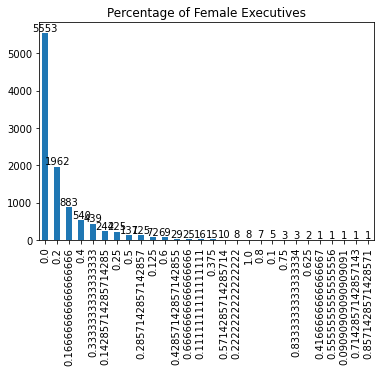

In [ ]:
female = result['%female'].value_counts()
female = female.plot.bar()
female.bar_label(female.containers[0])
female.set_title("Percentage of Female Executives")

Text(0.5, 1.0, 'Mean of percentage of female over 5 years')

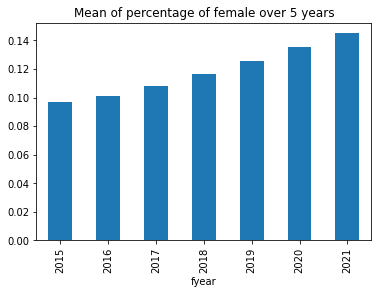

In [ ]:
result.groupby(['fyear'])['%female'].mean().plot(kind = 'bar').set_title("Mean of percentage of female over 5 years")

**R&D:**

Text(0.5, 1.0, 'Mean of R&D over 5 years')

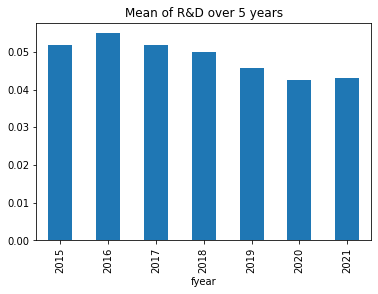

In [ ]:
result.groupby(['fyear'])['R&D'].mean().plot(kind = 'bar').set_title("Mean of R&D over 5 years")

Text(0.5, 1.0, 'Mean of R&D expenditure over 5 years')

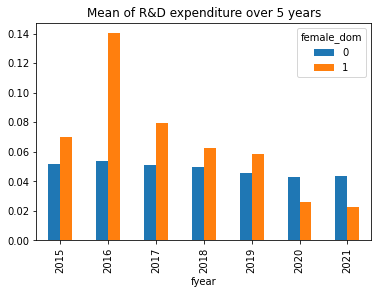

In [ ]:
result.groupby(['fyear','female_dom'])['R&D'].mean().unstack().plot(kind = 'bar').set_title("Mean of R&D expenditure over 5 years")

Text(0.5, 1.0, 'R&D expenditure pre & post Covid by gender dominance')

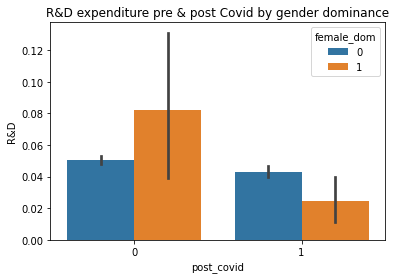

In [ ]:
sns.barplot(y='R&D',x='post_covid',hue='female_dom',data=result).set_title("R&D expenditure pre & post Covid by gender dominance")

**Leverage:**

Text(0.5, 1.0, 'Mean of Leverage over 5 years')

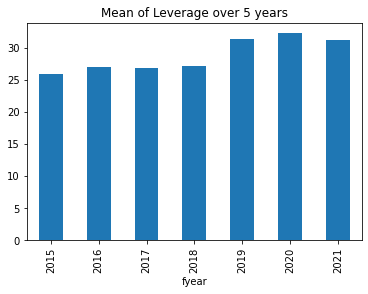

In [ ]:
result.groupby(['fyear'])['Leverage'].mean().plot(kind = 'bar').set_title("Mean of Leverage over 5 years")

Text(0.5, 1.0, 'Mean of Leverage over 5 years by gender dominance')

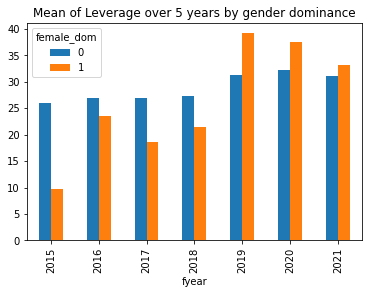

In [ ]:
result.groupby(['fyear','female_dom'])['Leverage'].mean().unstack().plot(kind = 'bar').set_title("Mean of Leverage over 5 years by gender dominance")

Text(0.5, 1.0, 'Leverage pre & post Covid by gender dominance')

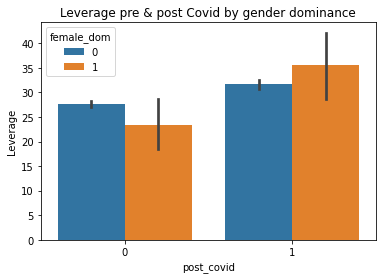

In [ ]:
sns.barplot(y='Leverage',x='post_covid',hue='female_dom',data=result).set_title("Leverage pre & post Covid by gender dominance")

**Cash Holdings:**

Text(0.5, 1.0, 'Mean of Cash holdings over 5 years')

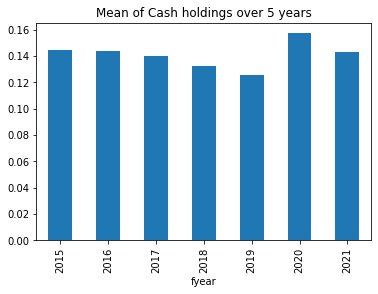

In [ ]:
result.groupby(['fyear'])['CashHolding'].mean().plot(kind = 'bar').set_title("Mean of Cash holdings over 5 years")

Text(0.5, 1.0, 'Mean of Cash holdings over 5 years by gender dominance')

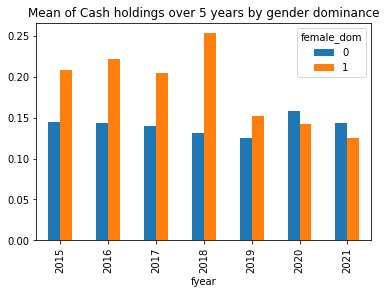

In [ ]:
result.groupby(['fyear','female_dom'])['CashHolding'].mean().unstack().plot(kind = 'bar').set_title("Mean of Cash holdings over 5 years by gender dominance")

Text(0.5, 1.0, 'Cash holdings pre & post Covid by gender dominance')

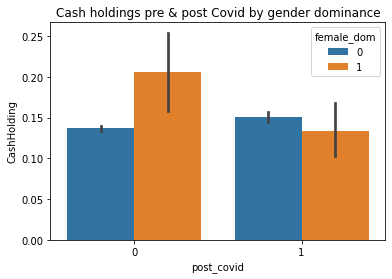

In [ ]:
sns.barplot(y='CashHolding',x='post_covid',hue='female_dom',data=result).set_title("Cash holdings pre & post Covid by gender dominance")